## Predicting Customer Churn

Identifying customers that are susceptible to churn in order to enhance retention strategies and boost business growth.

## Import the necessary libraries

In [1]:
from ast import literal_eval #converts a string representation of a Python data structure into the actual data structure.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## Data Collection

Load the dataset into python with pandas

In [2]:
df = pd.read_excel("Dataset.xlsx")

## ## Data Exploration

In Data exploration, we will be looking at :
* Understanding the data structure,statistics and quality of the dataset.
* Visualizing the data to get insights.
* Checking for missing values.

### checking the first five rows

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


### Checking for missing values

In [4]:
missing_values = df.isnull().sum()
missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

### Checking for duplicated values

In [5]:
df.duplicated().any()

False

### Get a statistical overview of the numerical columns in the dataset

In [6]:
stats_overview = df.describe()
stats_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


### Next we see how the target variable and some of the other variables are distributed.

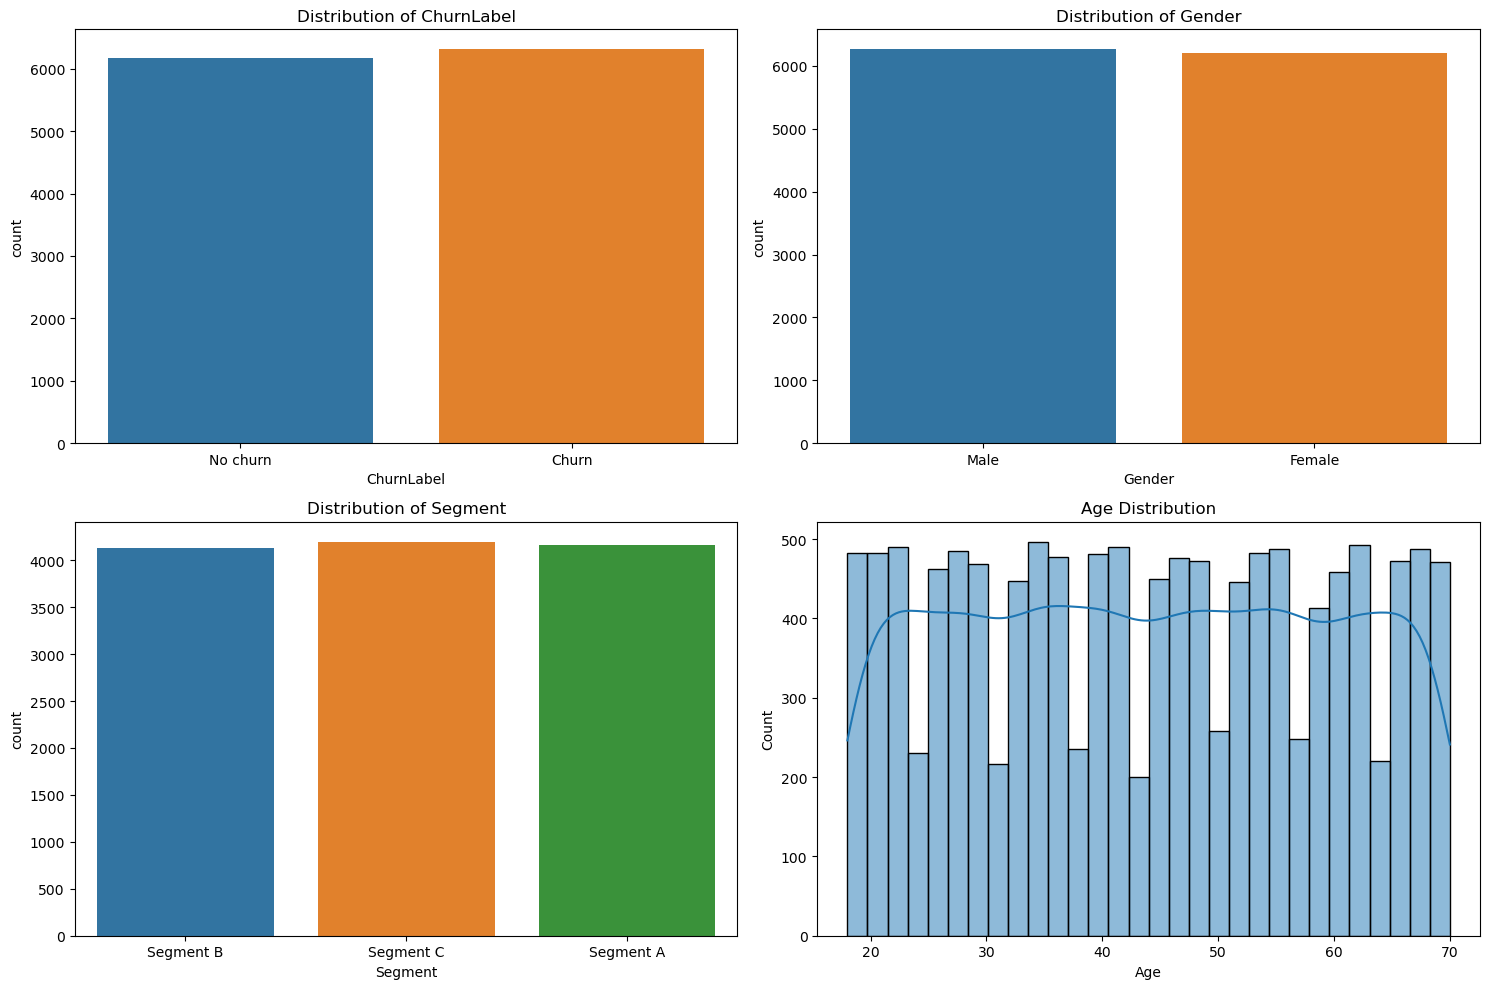

In [7]:
# set up the figures and axes
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

#Plot the distribution of the target variable ChurnLabel
sns.countplot(data=df, x = 'ChurnLabel', ax=ax[0,0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No churn', 'Churn'])

#Plot distribution of Gender
sns.countplot(data = df, x ="Gender", ax=ax[0,1])
ax[0,1].set_title('Distribution of Gender')

#Plot the distribution of Segment
sns.countplot(data=df, x='Segment', ax=ax[1,0])
ax[1,0].set_title('Distribution of Segment')

#Age Distribution
sns.histplot(df['Age'], bins = 30,ax=ax[1,1], kde =True)
ax[1,1].set_title("Age Distribution")

plt.tight_layout()
plt.show()

###  Correlation Analysis: Which columns in the dataset correlates with the ChurnLabel column

In [8]:
#Calculate correlation with ChurnLabel
correlation = df.select_dtypes(include = np.number).corr()
correlation

,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


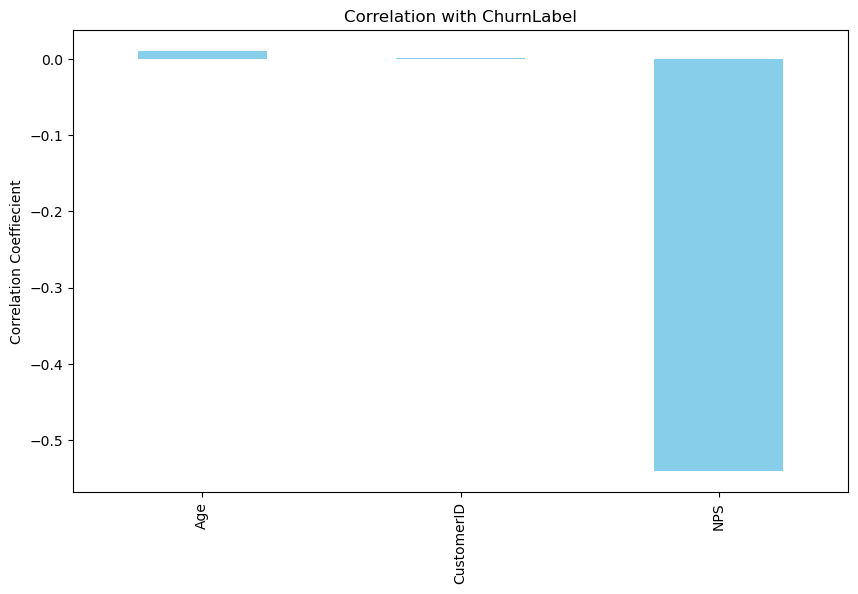

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [9]:
#Calculate correlation with ChurnLabel
correlation = df.select_dtypes(include = np.number).corr()['ChurnLabel'].sort_values(ascending=False)

#Plot the correlation
plt.figure(figsize=(10,6))
correlation.drop('ChurnLabel').plot(kind = 'bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coeffiecient')
plt.show()

correlation

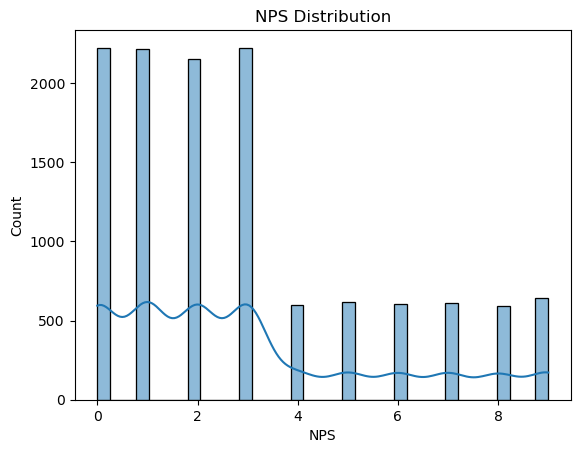

In [10]:
# Example Visualization: NPS Distribution
sns.histplot(df['NPS'], kde=True)
plt.title('NPS Distribution')
plt.xlabel('NPS')
plt.ylabel('Count')
plt.show()

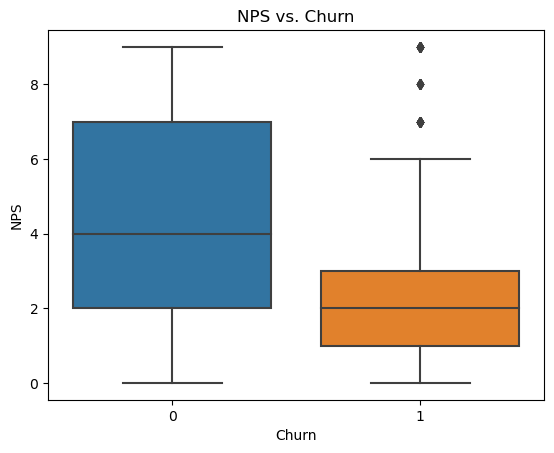

In [11]:
# Example Analysis: Correlation between NPS and Churn
sns.boxplot(x='ChurnLabel', y='NPS', data=df)
plt.title('NPS vs. Churn')
plt.xlabel('Churn')
plt.ylabel('NPS')
plt.show()

### Lets explore the nested columns and see how they are nested

In [12]:
# List out all the nested columns

nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#Print out the first values in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col,df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Temporal Analysis: Let's take a look at how the churn rate changes over time to see if there are any recurring patterns

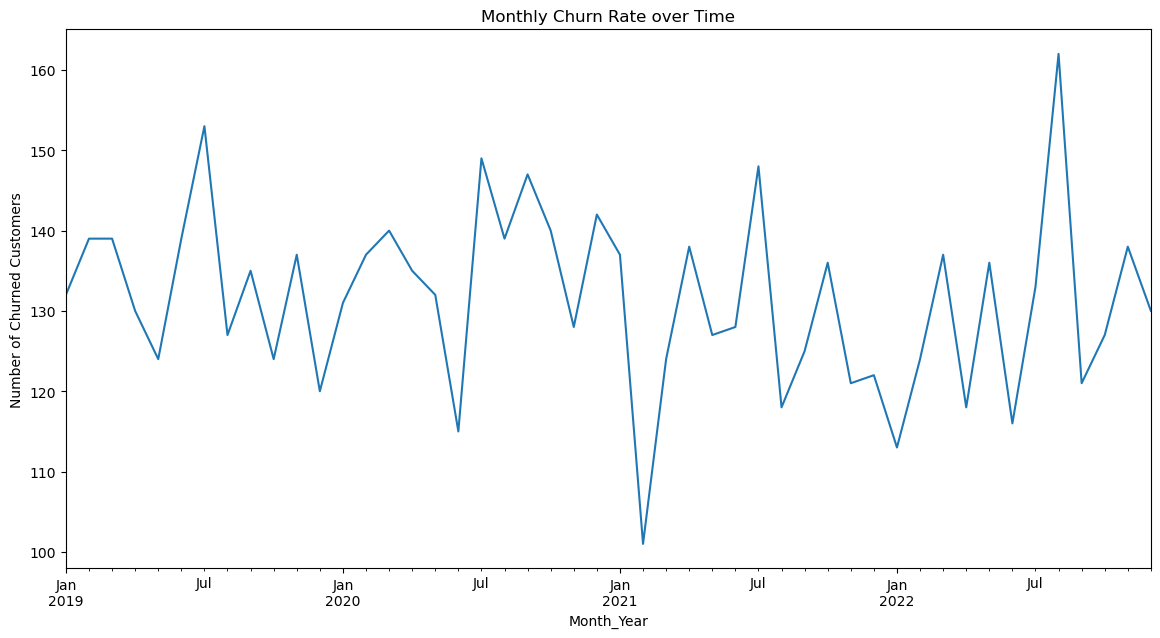

In [13]:
# Convert the timestamp to datetime format so that it can be grouped
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month-year from the Timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

#Group by MonthYear and calculate the churn rates
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

#Plot the churn rate over time
plt.figure(figsize=(14,7))
monthly_churn_rate.plot()
plt.title("Monthly Churn Rate over Time")
plt.ylabel("Number of Churned Customers")
plt.xlabel("Month_Year")
plt.show()

### Lets see if there are any patterns between the customer feedback rating and the churn label

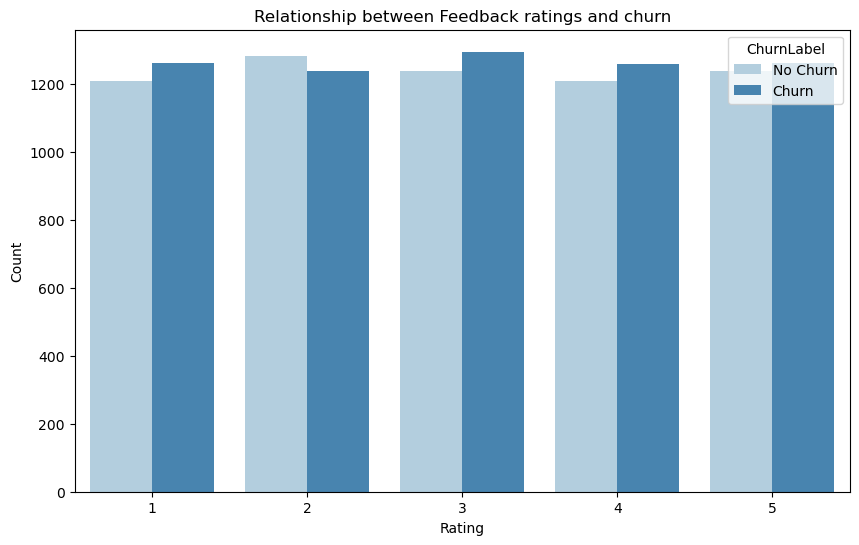

In [14]:
# Extract rating from the feedback column and creating a new column for it.  
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

#Plotting the relationship between feedback rating and churn
plt.figure(figsize=(10,6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette ='Blues')
plt.title("Relationship between Feedback ratings and churn")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title ='ChurnLabel', labels=['No Churn', 'Churn'])
plt.show()

From the visualization, there doesn't seem to be any indication that the feedback rating affects the ChurnLabel

## Data Preprocessing and Feature Engineering

Steps taken:
- create new features that may have predictive power
- convert categorical variables to numeric variables using encoding techniques
- scale or normalize numeric variables if necessary.
- remove irrelevant features
- split data into training and testing subsets

Let's begin by converting the nested values from string formats to list/ditionaries using literal_eval function.


In [15]:
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Apply the literal_eval function
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

In [16]:
#Purchase history
df["PurchasedProducts"] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df["PurchaseFrequency"] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x])) 
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x:sum([i['Value'] for i in x]))  

#SubscriptionDetails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x:x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x:x['Start_Date'])        
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x:x['End_Date'])        
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days
                                                      
#WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x:x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)']) 

#EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x:x['Logins']) 
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x:x['Frequency'])

#Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x:x['Comment'])
                                                      
#MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x)) 
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
lambda x:np.mean(
[(pd.to_datetime(i['Email_Clicked'])\
 - pd.to_datetime(i['Email_Opened'])).days for i in x])
)              

df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(lambda x:np.mean([(
pd.to_datetime(i['Email_Opened'])\
- pd.to_datetime(i['Email_Sent'])).days for i in x]))                                                     
                                                      

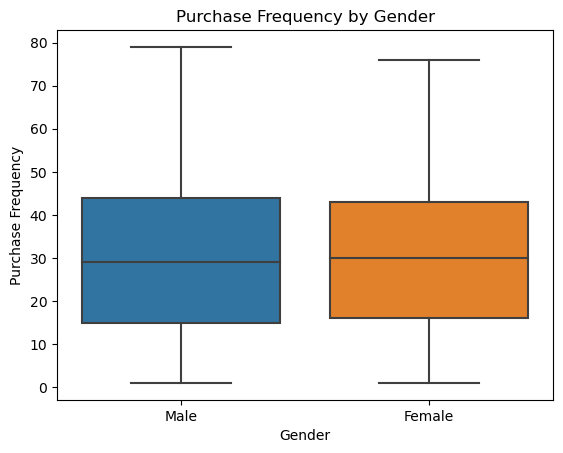

In [17]:
# Example Segmentation: Purchase Frequency by Gender
sns.boxplot(x='Gender', y='PurchaseFrequency', data=df)
plt.title('Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Frequency')
plt.show()

From the visualization, it seems like the gender has no effect on purchase frequency.

## Popular products

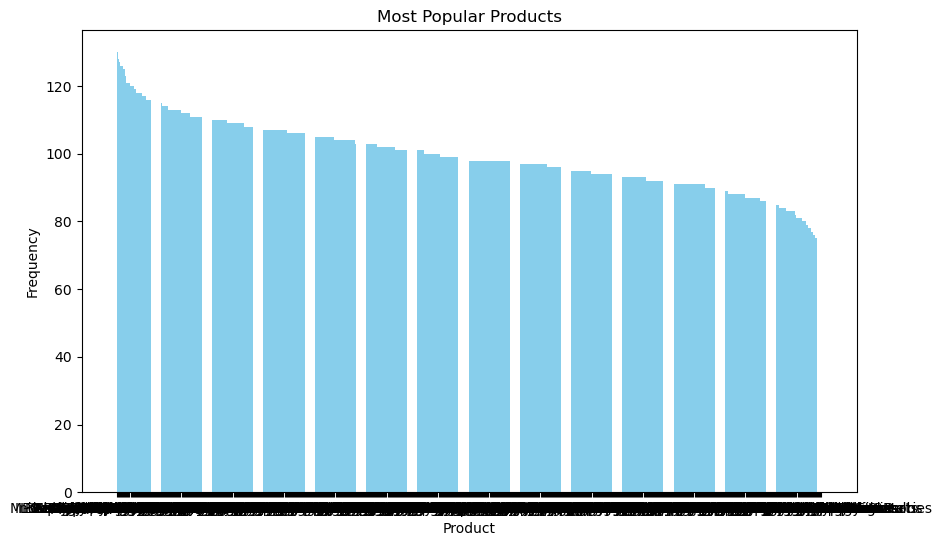

,Product,Frequency
618,Jewelry Findings,130
539,Baskets,128
547,Industrial Storage Accessories,127
594,Canopy & Gazebo Frames,126
16,Rugby Protective Gear,126
111,Aquarium Overflow Boxes,126
61,Livestock Feeders & Waterers,125
9,Footbags,125
108,Percussion Mallets,123
622,Sequins & Glitter,121


In [18]:
from collections import Counter

# Count the frequency of each product
product_counter = Counter('|'.join(df['PurchasedProducts']).split('|'))

# Convert to DataFrame for visualization
popular_products = pd.DataFrame(product_counter.items(), columns=['Product', 'Frequency'])

# Sort products by frequency
popular_products = popular_products.sort_values(by='Frequency', ascending=False)

# Visualize the popular products
plt.figure(figsize=(10, 6))
plt.bar(popular_products['Product'], popular_products['Frequency'], color='skyblue')
plt.title('Most Popular Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

# Print the most popular products
popular_products.head(10)

### Insights
The data suggests a diverse range of high-demand products, from crafting supplies and storage solutions to sports equipment and agricultural accessories.
 - There is a notable interest in DIY and crafting activities (e.g., Jewelry Findings, Sequins & Glitter).
 - Industrial and agricultural products (e.g., Industrial Storage Accessories, Livestock Feeders & Waterers) indicate ongoing needs in these sectors.
 - Recreational and sports items (e.g., Rugby Protective Gear, Footbags) highlight active participation in various physical activities.
 - The high frequency of Canopy & Gazebo Frames points to a trend in enhancing outdoor living spaces.
 
### Recommendations
 - Highlight the variety, quality, and creative possibilities of jewelry findings. Use social media platforms like Instagram and Pinterest to showcase DIY jewelry projects and tutorials.
 - Personalized Email Campaigns: Send targeted emails to customers who have purchased these products, offering related items or bundle deals.
 - Social Media Engagement: Use visually appealing content to engage with customers on social media platforms, showcasing the use of these popular products in creative ways.
 - Content Marketing: Create blog posts, videos, or tutorials on how to use these products effectively. Collaborate with influencers or industry experts to reach a broader audience.
 - Promotions and Discounts: Offer limited-time discounts, bundle deals, or loyalty rewards for these popular products to encourage repeat purchases and attract new customers.

### High frequency buyers

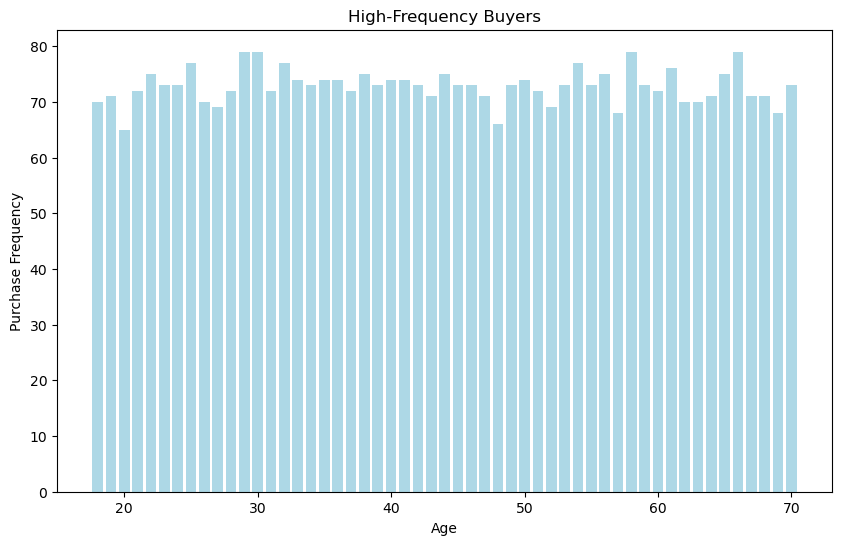

In [19]:
high_frequency_threshold =20

high_freq_buyers = df[df['PurchaseFrequency'] > high_frequency_threshold]
# Visualize the high-frequency buyers
plt.figure(figsize=(10, 6))
plt.bar(high_freq_buyers['Age'], high_freq_buyers['PurchaseFrequency'], color='lightblue')
plt.title('High-Frequency Buyers')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.show()

In [20]:
high_freq_buyers.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,SubscriptionEndDate,SubscriptionDuration,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackComment,MarketingCommunicationNoOfEmails,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,2022-10-27,871,49,15,19,Weekly,I move baby go small big. Office institution s...,8,319.0,818.0
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,2022-03-27,803,25,31,4,Daily,Yard feel never miss ask billion Congress. Fly...,10,423.0,159.0
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,2022-11-09,580,77,51,12,Weekly,Ten determine unit interview challenge stock. ...,7,96.0,193.0
6,1007,Wesley Turner,52,Female,Emilyland,brookekrause@example.net,623.025.4444x899,"93854 Patricia Inlet Apt. 323\nJohnburgh, MS 6...",Segment B,"[{'Product': 'Paint Shakers', 'Frequency': 3, ...",...,2022-03-21,435,23,25,15,Weekly,Give draw politics. Gas Democrat matter least ...,5,284.0,766.0
7,1008,Kristin Webb,48,Male,Jilltown,melissa05@example.com,(746)082-9841x8537,"1911 Thomas Falls\nWest Kellyside, NH 39351",Segment B,"[{'Product': 'Wagons', 'Frequency': 10, 'Value...",...,2021-11-12,237,35,33,6,Weekly,Suddenly pay director local.,8,209.0,729.0


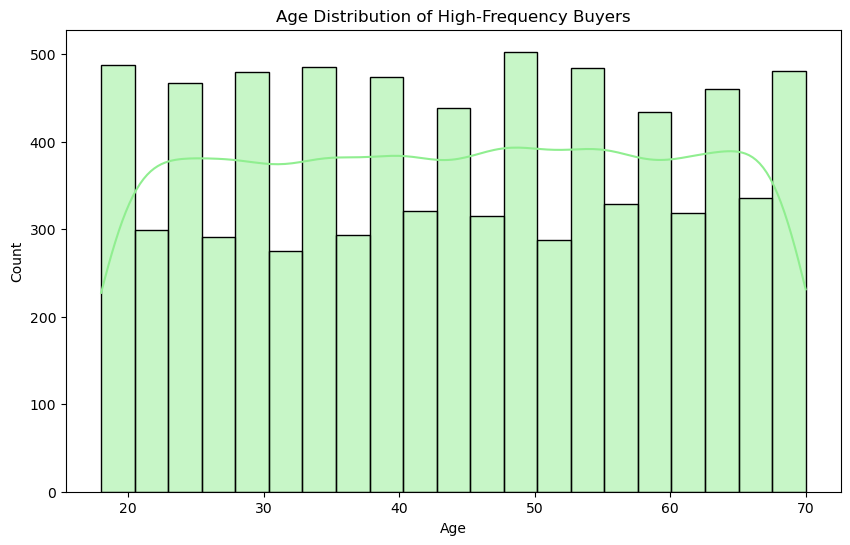

In [21]:
# Additional analysis - Age distribution of high-frequency buyers
plt.figure(figsize=(10, 6))
sns.histplot(high_freq_buyers['Age'], kde=True, color='lightgreen')
plt.title('Age Distribution of High-Frequency Buyers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Let's look at the subscription plan data

In [22]:
df['SubscriptionPlan'].value_counts()

Basic        680
Student      661
Essential    656
Unlimited    653
Bronze       649
Plus         647
Silver       646
Select       629
Gold         622
Prime        620
Eco          615
Flex         614
Deluxe       614
Smart        613
Pro          610
VIP          609
Express      593
Family       593
Trial        585
Elite        574
Name: SubscriptionPlan, dtype: int64

### Insights:
Most Popular Plans:

 - Basic: The most popular subscription plan with 680 subscribers. This plan likely offers essential features at an affordable price, making it attractive to a wide audience.
 - Student: With 661 subscribers, this plan might offer discounts or special features tailored for students.
 - Essential and Unlimited: Both plans have high subscription numbers (656 and 653, respectively), indicating they provide valuable features for users.

Least Popular Plans:

 - Elite: The least popular plan with 574 subscribers. This could indicate that the features or pricing of this plan do not appeal to many users.
 - Trial and Family: These plans have relatively lower subscriptions (585 and 593, respectively), suggesting they may need reevaluation or better promotion.

### Recommendations
 - For popular plans like Basic, Student, and Essential, consider maintaining or slightly enhancing the features to retain subscribers. Use customer testimonials and success stories to highlight the value of these plans. Additionally, promote the Student plan to university students through campus events and social media ads targeting younger demographics.
 - For less popular plans like Elite, Trial, and Family, reassess the features and pricing. Consider adding more value or reducing the cost to attract more users for example offer special promotions, discounts, or limited-time offers.
- Gather feedback from subscribers of less popular plans to understand their needs and preferences. Use this information to improve the plans and make them more appealing.
 - Conduct surveys and focus groups to gain insights into why certain plans are more popular and what additional features users might be interested in.

## Subscription Duration data

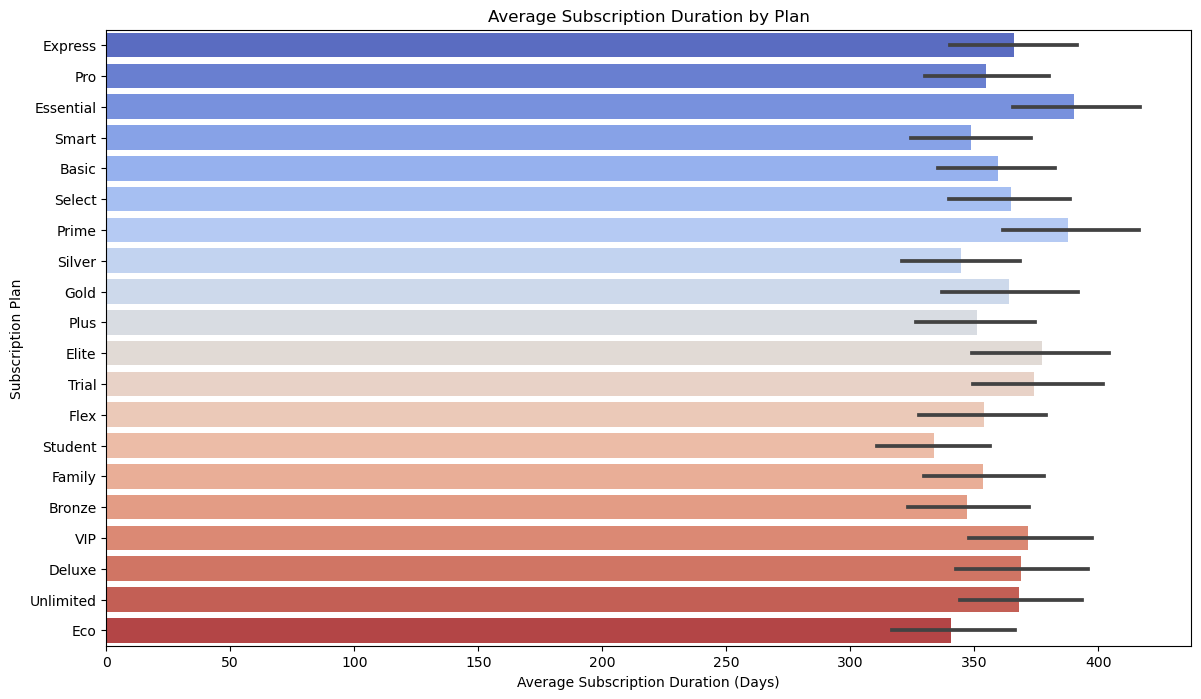

In [23]:
# Visualize average subscription duration
plt.figure(figsize=(14, 8))
sns.barplot(x='SubscriptionDuration', y='SubscriptionPlan', data=df, palette='coolwarm')
plt.title('Average Subscription Duration by Plan')
plt.xlabel('Average Subscription Duration (Days)')
plt.ylabel('Subscription Plan')
plt.show()

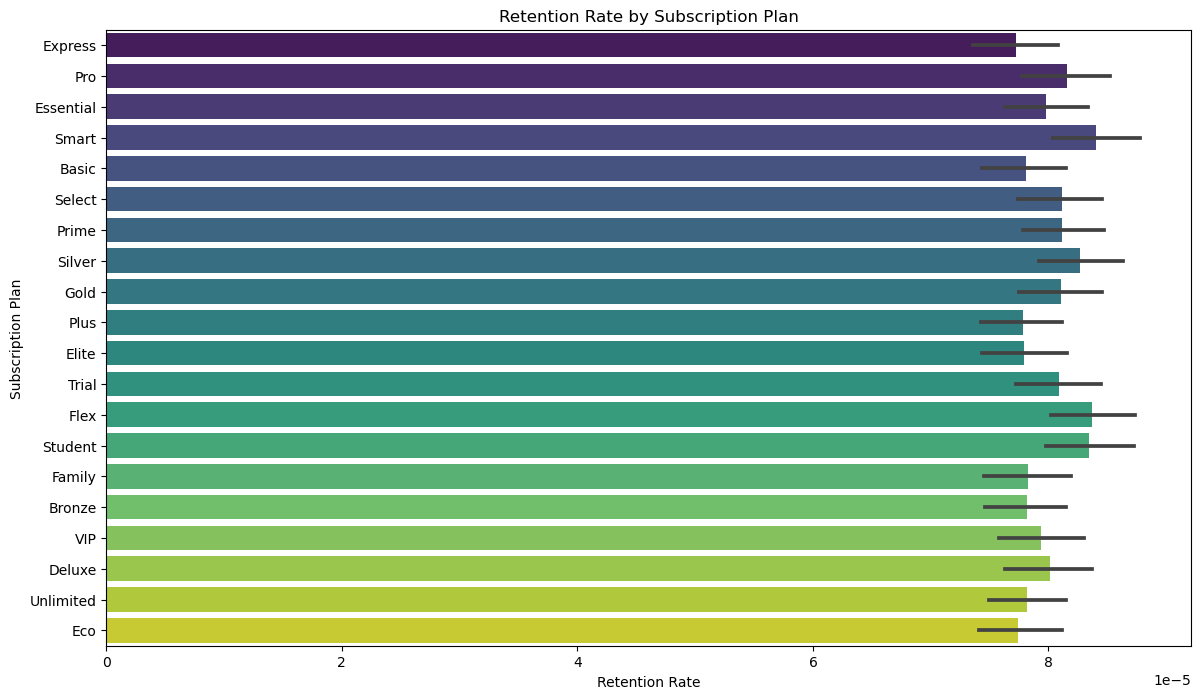

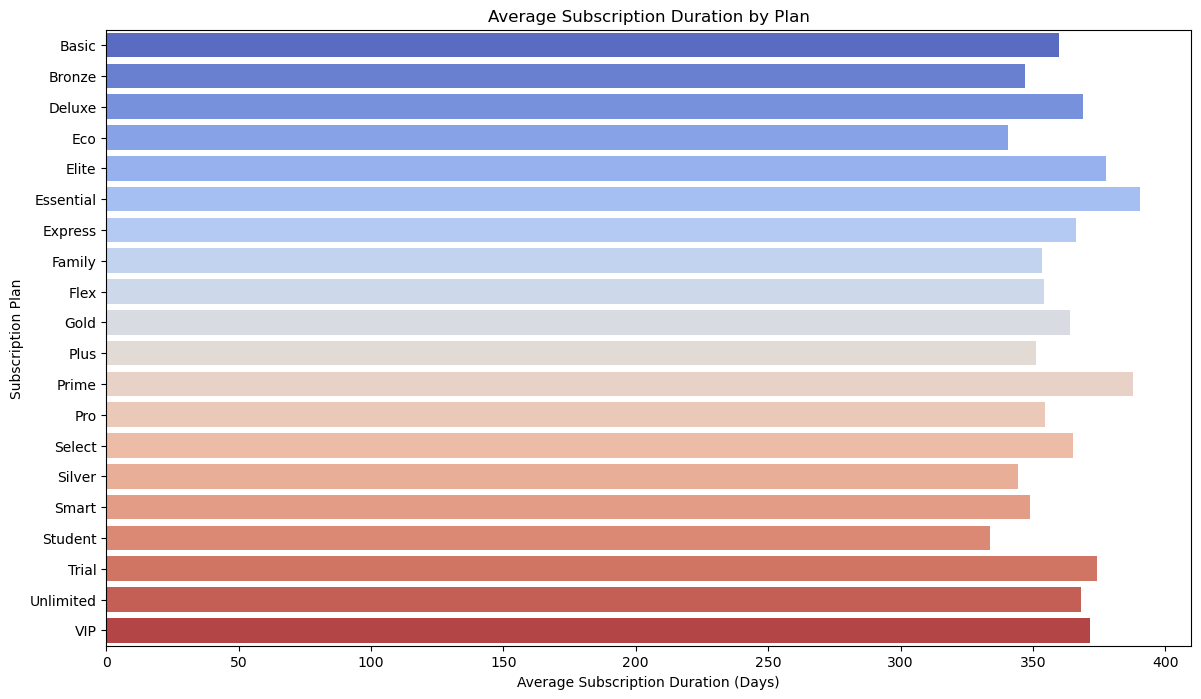

In [24]:
# Calculate retention rates
df['RetentionRate'] = df['PurchaseFrequency'] / df['PurchaseFrequency'].sum()

# Analyze subscription duration
average_duration = df.groupby('SubscriptionPlan')['SubscriptionDuration'].mean()

# Visualize retention rates
plt.figure(figsize=(14, 8))
sns.barplot(x='RetentionRate', y='SubscriptionPlan', data=df, palette='viridis')
plt.title('Retention Rate by Subscription Plan')
plt.xlabel('Retention Rate')
plt.ylabel('Subscription Plan')
plt.show()

# Visualize average subscription duration
plt.figure(figsize=(14, 8))
sns.barplot(x=average_duration.values, y=average_duration.index, palette='coolwarm')
plt.title('Average Subscription Duration by Plan')
plt.xlabel('Average Subscription Duration (Days)')
plt.ylabel('Subscription Plan')
plt.show()


### Average subscription duration per plan

In [25]:
average_duration_per_plan = df.groupby('SubscriptionPlan')['SubscriptionDuration'].mean().reset_index().sort_values(by ='SubscriptionDuration', ascending=False)
average_duration_per_plan

,SubscriptionPlan,SubscriptionDuration
5,Essential,390.301829
11,Prime,387.850000
4,Elite,377.468641
17,Trial,374.287179
19,VIP,371.620690
2,Deluxe,368.856678
18,Unlimited,368.065850
6,Express,366.220911
13,Select,365.009539
9,Gold,364.125402


### Insights
Top Performing Plans:
 - Essential (390.3 days), Prime (387.85 days), and Elite (377.47 days) have the longest average subscription durations. These plans are retaining customers for more than a year on average, suggesting that they are well-received and valued by subscribers.

Mid-Range Performance:
 - Plans like Trial (374.29 days), VIP (371.62 days), Deluxe (368.86 days), and Unlimited (368.07 days) also show strong retention, slightly below the top-performing plans but still indicating good customer satisfaction and engagement.

Average Performance:
 - Express (366.22 days), Select (365.01 days), Gold (364.13 days), and Basic (359.71 days) have average retention around a year. This indicates stable performance, though there's potential for improvement.

Below Average Performance:
 - Plans like Pro (354.59 days), Flex (354.05 days), Family (353.41 days), and Plus (351.13 days) show slightly below-average retention.

Low Performing Plans:
 - Smart (348.83 days), Bronze (346.92 days), Silver (344.46 days), Eco (340.71 days), and Student (333.87 days) have the shortest average durations, indicating potential issues with these plans that may be causing subscribers to churn sooner.

### Recommendations
Analyze Top Performing Plans:
 - Investigate why Essential, Prime, and Elite plans are performing well. Identify key features, benefits, or pricing strategies that are particularly appealing to customers. Use these insights to enhance other plans.

Enhance Mid-Range Plans:
 - For plans like Trial, VIP, Deluxe, and Unlimited, consider small adjustments or promotions to push their average duration closer to the top-performing plans. Highlight the unique benefits of these plans in marketing efforts.

Revamp Below Average and Low Performing Plans:
 - Conduct surveys or focus groups with subscribers of the Pro, Flex, Family, Plus, Smart, Bronze, Silver, Eco, and Student plans to identify pain points. Common issues might include pricing, lack of value, or specific features. Based on feedback, consider revamping these plans by adjusting pricing, adding new features, or improving existing ones.

Incentives for Longer Subscriptions:
 - Introduce incentives for customers to commit to longer subscription periods, such as discounts for annual plans, loyalty rewards, or exclusive content. This can help increase the average subscription duration across all plans.

### Website Usage

### Let's first look at the summary statistics

In [26]:
df['WebsitePageViews'].describe()


count    12483.000000
mean        50.634944
std         28.930760
min          1.000000
25%         26.000000
50%         51.000000
75%         76.000000
max        100.000000
Name: WebsitePageViews, dtype: float64

In [27]:
df['WebsiteTimeSpent'].describe()

count    12483.000000
mean        34.602499
std         27.603618
min          1.000000
25%         14.000000
50%         26.000000
75%         51.000000
max        103.000000
Name: WebsiteTimeSpent, dtype: float64

In [28]:
# Calculate descriptive statistics for engagement metrics by churn label
engagement_stats = df.groupby('ChurnLabel')[['WebsitePageViews', 'WebsiteTimeSpent']].describe()
print("Engagement Metrics by Churn Label:")
engagement_stats


Engagement Metrics by Churn Label:


WebsitePageViews                                               \
                      count       mean        std  min   25%   50%   75%   
ChurnLabel                                                                 
0                    6169.0  51.345761  28.977225  1.0  26.0  51.0  77.0   
1                    6314.0  49.940450  28.870686  1.0  25.0  50.0  75.0   

                  WebsiteTimeSpent                                         \
              max            count       mean        std  min   25%   50%   
ChurnLabel                                                                  
0           100.0           6169.0  50.845032  29.650269  1.0  25.0  50.0   
1           100.0           6314.0  18.732974  11.743482  1.0  10.0  18.0   

                         
             75%    max  
ChurnLabel               
0           77.0  103.0  
1           27.0  101.0

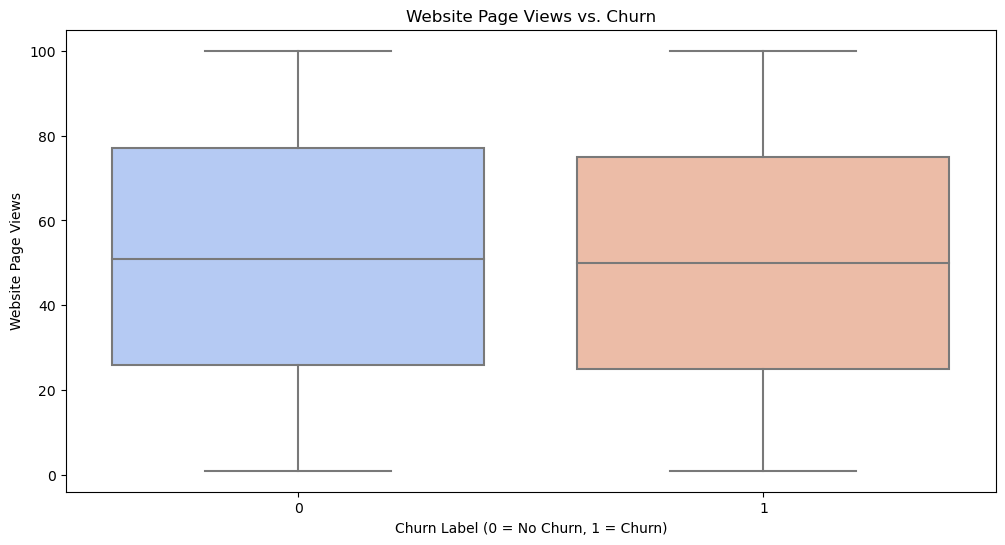

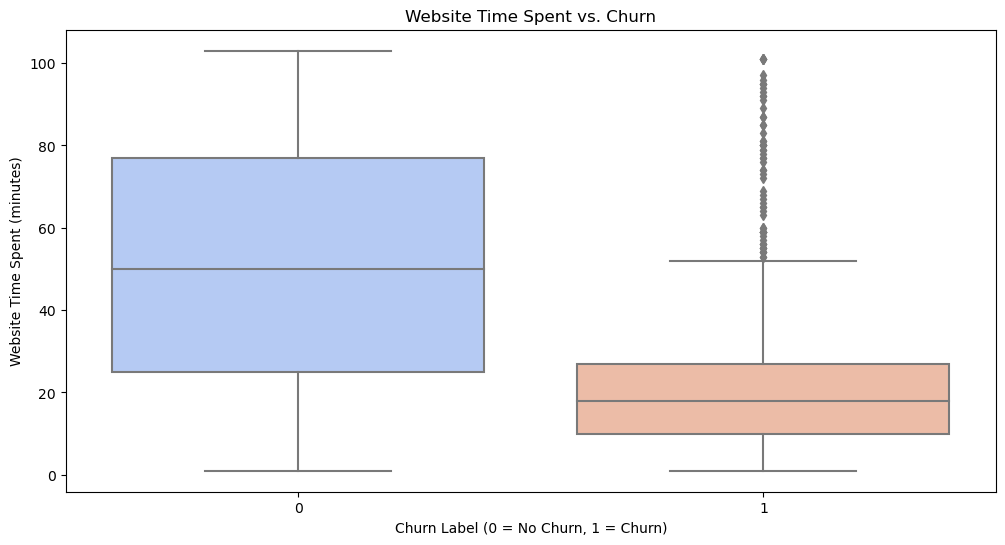

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Website Page Views vs. Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='ChurnLabel', y='WebsitePageViews', data=df, palette='coolwarm')
plt.title('Website Page Views vs. Churn')
plt.xlabel('Churn Label (0 = No Churn, 1 = Churn)')
plt.ylabel('Website Page Views')
plt.show()

# Visualize Website Time Spent vs. Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='ChurnLabel', y='WebsiteTimeSpent', data=df, palette='coolwarm')
plt.title('Website Time Spent vs. Churn')
plt.xlabel('Churn Label (0 = No Churn, 1 = Churn)')
plt.ylabel('Website Time Spent (minutes)')
plt.show()

In [30]:
from scipy.stats import ttest_ind

# Perform t-tests to compare engagement metrics between churned and non-churned users
page_views_churned = df[df['ChurnLabel'] == 1]['WebsitePageViews']
page_views_not_churned = df[df['ChurnLabel'] == 0]['WebsitePageViews']
time_spent_churned = df[df['ChurnLabel'] == 1]['WebsiteTimeSpent']
time_spent_not_churned = df[df['ChurnLabel'] == 0]['WebsiteTimeSpent']

t_test_page_views = ttest_ind(page_views_churned, page_views_not_churned, equal_var=False)
t_test_time_spent = ttest_ind(time_spent_churned, time_spent_not_churned, equal_var=False)

print("T-test for Website Page Views:")
print(t_test_page_views)

print("\nT-test for Website Time Spent:")
print(t_test_time_spent)


T-test for Website Page Views:
Ttest_indResult(statistic=-2.7139697958196733, pvalue=0.006657358775201183)

T-test for Website Time Spent:
Ttest_indResult(statistic=-79.210377135534, pvalue=0.0)


In [31]:
# Insights
print("\nInsights:")
if t_test_page_views.pvalue < 0.05:
    print("There is a significant difference in Website Page Views between churned and non-churned users.")
else:
    print("There is no significant difference in Website Page Views between churned and non-churned users.")

if t_test_time_spent.pvalue < 0.05:
    print("There is a significant difference in Website Time Spent between churned and non-churned users.")
else:
    print("There is no significant difference in Website Time Spent between churned and non-churned users.")

# Recommendations
recommendations = """
Recommendations:
1. Enhance Engagement for At-Risk Users: For users with lower engagement metrics, implement strategies to increase website interaction, such as personalized content, user engagement campaigns, and targeted marketing.
2. Monitor High Engagement Churners: Investigate why highly engaged users are still churning. Look for patterns or issues in other areas such as customer support, product issues, or pricing.
3. Improve User Experience: Continuously improve the user experience to retain users, focusing on reducing churn among users with low engagement by making the website more intuitive and providing engaging content.
4. Early Intervention: Develop a predictive model to identify users at risk of churn based on engagement metrics and intervene early with retention strategies.
"""

print(recommendations)



Insights:
There is a significant difference in Website Page Views between churned and non-churned users.
There is a significant difference in Website Time Spent between churned and non-churned users.

Recommendations:
1. Enhance Engagement for At-Risk Users: For users with lower engagement metrics, implement strategies to increase website interaction, such as personalized content, user engagement campaigns, and targeted marketing.
2. Monitor High Engagement Churners: Investigate why highly engaged users are still churning. Look for patterns or issues in other areas such as customer support, product issues, or pricing.
3. Improve User Experience: Continuously improve the user experience to retain users, focusing on reducing churn among users with low engagement by making the website more intuitive and providing engaging content.
4. Early Intervention: Develop a predictive model to identify users at risk of churn based on engagement metrics and intervene early with retention strategies.

In [32]:
# Define thresholds for high and low engagement
page_views_threshold = df['WebsitePageViews'].median()
time_spent_threshold = df['WebsiteTimeSpent'].median()

# Segment users based on engagement
df['EngagementLevel'] = 'Low'
df.loc[(df['WebsitePageViews'] > page_views_threshold) & (df['WebsiteTimeSpent'] > time_spent_threshold), 'EngagementLevel'] = 'High'

print("\nUser Engagement Levels:")
df[['WebsitePageViews', 'WebsiteTimeSpent', 'EngagementLevel']]



User Engagement Levels:


,WebsitePageViews,WebsiteTimeSpent,EngagementLevel
0,49,15,Low
1,100,9,Low
2,1,97,Low
3,25,31,Low
4,77,51,High
...,...,...,...
12478,70,57,High
12479,71,66,High
12480,96,1,Low
12481,63,2,Low


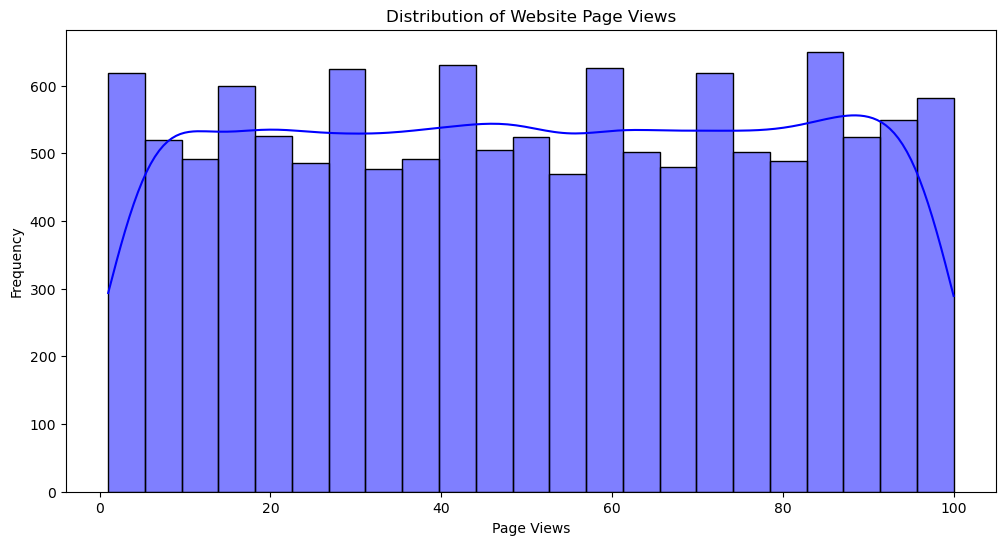

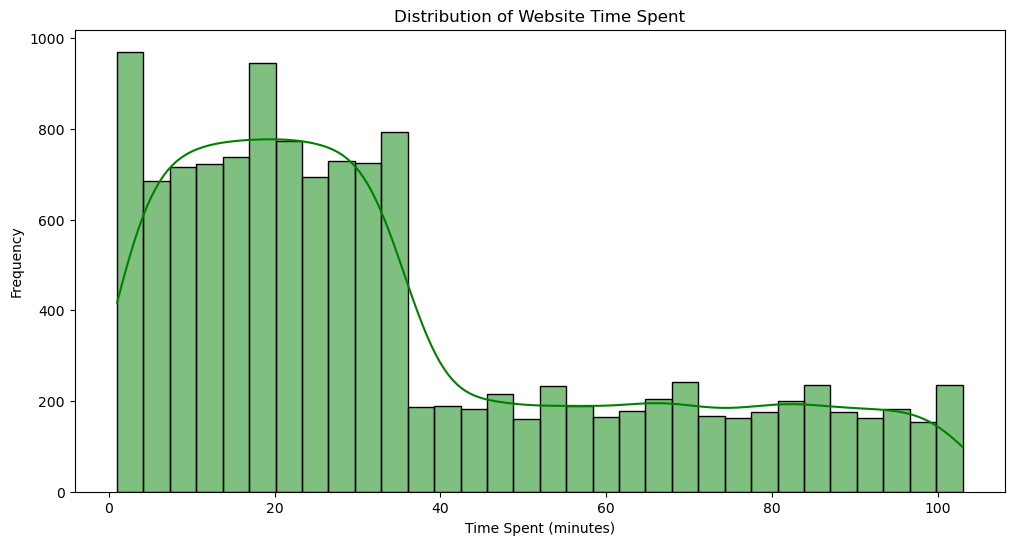

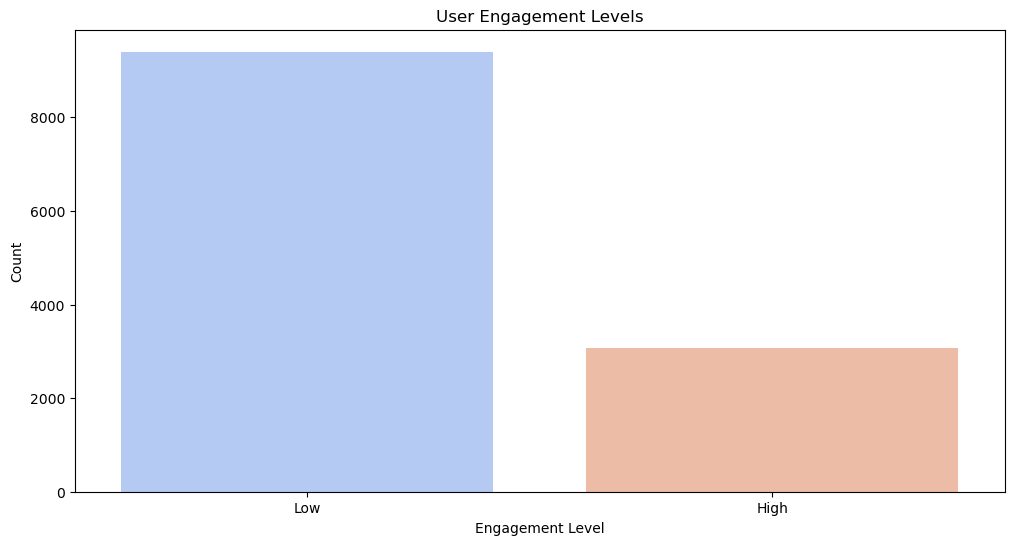

In [33]:
# Visualize page views
plt.figure(figsize=(12, 6))
sns.histplot(df['WebsitePageViews'], kde=True, color='blue')
plt.title('Distribution of Website Page Views')
plt.xlabel('Page Views')
plt.ylabel('Frequency')
plt.show()

# Visualize time spent
plt.figure(figsize=(12, 6))
sns.histplot(df['WebsiteTimeSpent'], kde=True, color='green')
plt.title('Distribution of Website Time Spent')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.show()

# Visualize engagement levels
plt.figure(figsize=(12, 6))
sns.countplot(x='EngagementLevel', data=df, palette='coolwarm')
plt.title('User Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()


Special extraction from three columns:
 - ServiceInteraction
 - PaymentHistory
 - ClickstreamData
 
Check for the unique parameters/values in these columns.

In [34]:
# Get all unique ServiceInteraction 'Types'
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type)) 
print("All unique Service Interaction Types:", unique_service_interaction_type)

#Get all unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods)) 
print("All unique Payment History Methods:", unique_payment_history_methods)

#Get all unique ClickstreamData 'Action'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in  clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions)) 
print("All unique Clickstream Data Actions:", unique_clickstream_data_actions)

All unique Service Interaction Types: ['Email', 'Chat', 'Call']
All unique Payment History Methods: ['Credit Card', 'PayPal', 'Bank Transfer']
All unique Clickstream Data Actions: ['Add to Cart', 'Click', 'Search']


From these three columns, we're going to be encoding more

In [35]:
#ServiceInteractions
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type']== usit]))
    
#PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x:np.mean([i['Late_Payments'] for i in x]))

#ClickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickstreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

In [36]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,RetentionRate,EngagementLevel,ServiceInteractions_Email,ServiceInteractions_Chat,ServiceInteractions_Call,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickstreamData_Add to Cart,ClickstreamData_Click,ClickstreamData_Search
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,0.000101,Low,1,2,1,40,13.333333,8,4,12
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,0.000011,Low,10,4,5,10,3.333333,8,9,7
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,0.000037,Low,1,1,1,8,2.666667,2,3,7
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,0.000074,Low,18,24,17,79,26.333333,15,16,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,0.000103,High,5,1,4,2,0.666667,17,9,4


### Service interactions

In [37]:
df['ServiceInteractions_Call'].describe()

count    12483.000000
mean         6.750300
std          5.790698
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         31.000000
Name: ServiceInteractions_Call, dtype: float64

In [38]:
df['ServiceInteractions_Email'].describe()

count    12483.000000
mean         6.838020
std          5.871361
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         32.000000
Name: ServiceInteractions_Email, dtype: float64

In [39]:
df['ServiceInteractions_Chat'].describe()

count    12483.000000
mean         6.779620
std          5.828992
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         30.000000
Name: ServiceInteractions_Chat, dtype: float64

In [40]:
# Summarize the interactions by ChurnLabel
service_interactions_summary = df.groupby('ChurnLabel').agg({
    'ServiceInteractions_Call': 'mean',
    'ServiceInteractions_Email': 'mean',
    'ServiceInteractions_Chat': 'mean'
}).reset_index()

service_interactions_summary


,ChurnLabel,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat
0,0,3.505755,3.545145,3.513373
1,1,9.920336,10.055274,9.970858


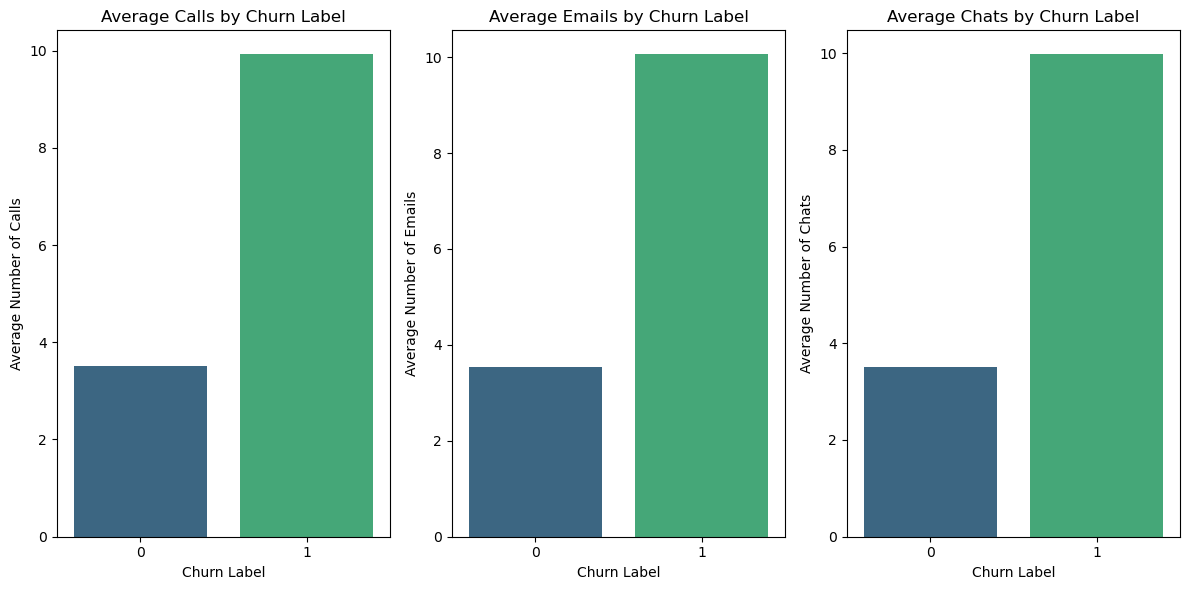

In [41]:
# Plot the service interactions
plt.figure(figsize=(12, 6))

# Calls
plt.subplot(1, 3, 1)
sns.barplot(x='ChurnLabel', y='ServiceInteractions_Call', data=service_interactions_summary, palette='viridis')
plt.title('Average Calls by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Average Number of Calls')

# Emails
plt.subplot(1, 3, 2)
sns.barplot(x='ChurnLabel', y='ServiceInteractions_Email', data=service_interactions_summary, palette='viridis')
plt.title('Average Emails by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Average Number of Emails')

# Chats
plt.subplot(1, 3, 3)
sns.barplot(x='ChurnLabel', y='ServiceInteractions_Chat', data=service_interactions_summary, palette='viridis')
plt.title('Average Chats by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Average Number of Chats')

plt.tight_layout()
plt.show()


### Insights
The data clearly shows that churned customers have significantly more interactions across all service channels.

Possible Indicators of Dissatisfaction:

 - The higher frequency of service interactions among churned customers could indicate unresolved issues or dissatisfaction with the service.
 - Customers who contact support more frequently might be facing recurring problems, leading to frustration and eventually churn.

### Recommendations
 - Personalized Attention: Implement a system to flag customers with high interaction counts for personalized follow-up.
 - Priority Support: Offer priority support to customers who frequently contact service to resolve issues more quickly.
 - Root Cause Analysis: Analyze the common reasons behind high interaction counts to identify recurring problems.
 - Improve Service Quality: Address these recurring issues to improve overall service quality and reduce the need for frequent support interactions.
 - Proactive Engagement: Develop strategies to proactively reach out to customers showing early signs of dissatisfaction (e.g., increased interaction frequency).
 - Feedback Mechanism: Use surveys or follow-up calls to gather feedback from high-interaction customers and make necessary improvements.
 - Regular Monitoring: Continuously monitor service interaction data to identify trends and patterns.
 - Adjust Support Strategies: Use the insights gained to adjust customer support strategies dynamically, ensuring better customer satisfaction and retention.

### Number of late payments by Churn label

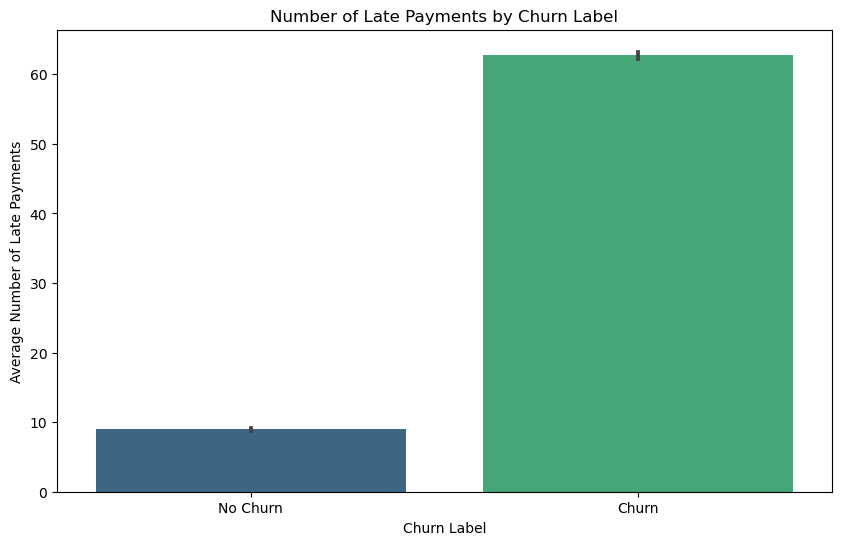

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='ChurnLabel', y='PaymentHistoryNoOfLatePayments', data=df, palette='viridis')
plt.title('Number of Late Payments by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Average Number of Late Payments')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()


In [43]:
churnpay = df.groupby('ChurnLabel')['PaymentHistoryNoOfLatePayments'].mean().reset_index()
churnpay

,ChurnLabel,PaymentHistoryNoOfLatePayments
0,0,8.949587
1,1,62.758473


### Insights
Customers who churn have an average of 62.76 late payments, while those who do not churn have an average of only 8.95 late payments.
This indicates that customers with frequent late payments are more likely to churn.

### Recommendation
 - Early Intervention for High-Risk Customers:Identify customers with a high number of late payments and provide targeted support to address their issues. This could include financial counseling, reminders, or flexible payment plans.

 - Incentivize Timely Payments:Implement a reward system for customers who make timely payments consistently. This could help reduce the number of late payments and, consequently, the churn rate.

 - Flexible Payment Options:Offer flexible payment options to customers struggling with timely payments. This could include installment plans, payment extensions, or grace periods.

 - Regular Monitoring:Continuously monitor the payment behaviors of customers to identify those at risk of churn early. This will enable timely intervention.

 - Customer Communication:Maintain clear and consistent communication with customers regarding payment deadlines, options, and consequences of late payments. Transparency can help in reducing late payments and improving customer satisfaction.

### Number of Late payments by subscription plan

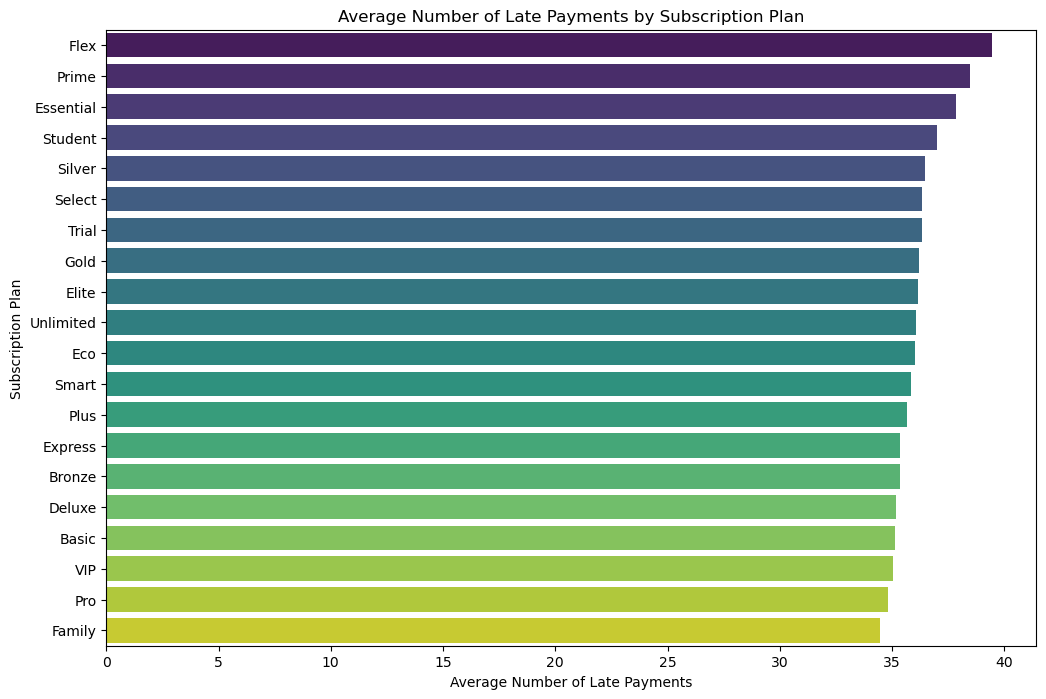

In [44]:
# Group by SubscriptionPlan and calculate the average number of late payments
late_payments_by_plan = df.groupby('SubscriptionPlan')['PaymentHistoryNoOfLatePayments'].mean().reset_index()

# Sort the DataFrame for better visualization
late_payments_by_plan = late_payments_by_plan.sort_values(by='PaymentHistoryNoOfLatePayments', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='PaymentHistoryNoOfLatePayments', y='SubscriptionPlan', data=late_payments_by_plan, palette='viridis')
plt.title('Average Number of Late Payments by Subscription Plan')
plt.xlabel('Average Number of Late Payments')
plt.ylabel('Subscription Plan')
plt.show()

In [45]:
late_payments_by_plan

,SubscriptionPlan,PaymentHistoryNoOfLatePayments
8,Flex,39.452769
11,Prime,38.459677
5,Essential,37.841463
16,Student,36.992436
14,Silver,36.459752
13,Select,36.343402
17,Trial,36.333333
9,Gold,36.215434
4,Elite,36.177700
18,Unlimited,36.079632


### Insights
- High Late Payments:
The Flex, Prime, and Essential plans have the highest average number of late payments (39.45, 38.46, and 37.84 respectively).
These plans might be more prone to late payments due to factors such as pricing, plan features, or the type of customers they attract.

 - Moderate Late Payments:
Plans like Student, Silver, and Select have moderately high late payments (around 36.99, 36.46, and 36.34 respectively).
These plans may also need attention but are not as critical as the top three.

 - Low Late Payments:
The Family, Pro, and VIP plans have relatively lower average late payments (34.46, 34.81, and 35.02 respectively).
These plans seem to have better payment compliance and might be appealing to more financially stable customers.

### Lets look further into churn rate by gender and gender & late payment  by age group and gender

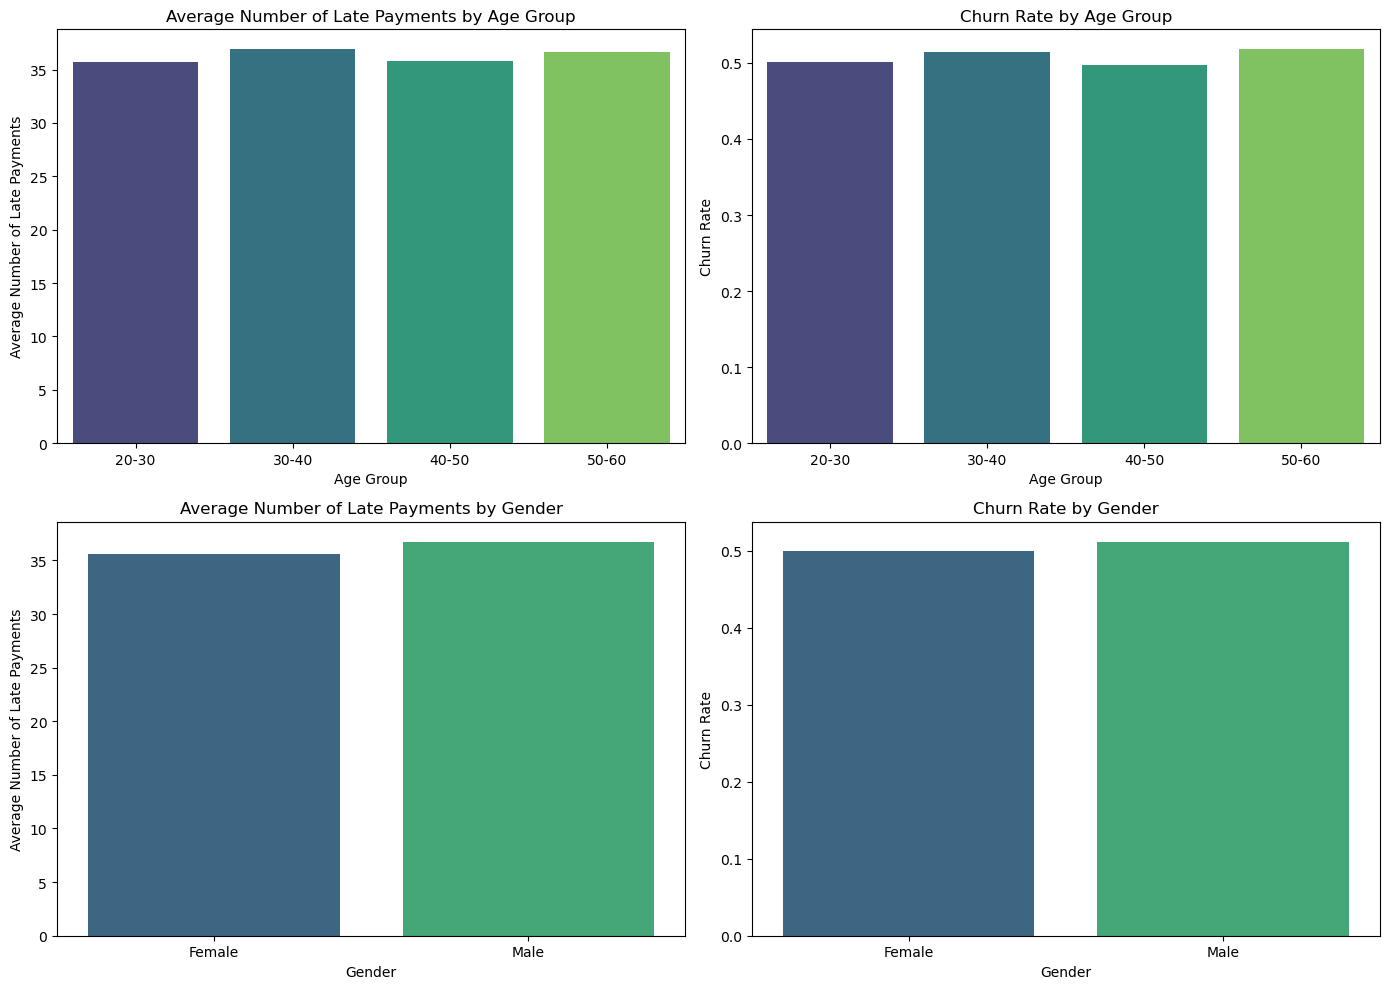

In [46]:
# Calculate average number of late payments by Age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Average number of late payments by Age group
age_late_payments = df.groupby('AgeGroup')['PaymentHistoryNoOfLatePayments'].mean().reset_index()

# Churn rate by Age group
age_churn = df.groupby('AgeGroup')['ChurnLabel'].mean().reset_index()

# Average number of late payments by Gender
gender_late_payments = df.groupby('Gender')['PaymentHistoryNoOfLatePayments'].mean().reset_index()

# Churn rate by Gender
gender_churn = df.groupby('Gender')['ChurnLabel'].mean().reset_index()

# Visualization
plt.figure(figsize=(14, 10))

# Average number of late payments by Age group
plt.subplot(2, 2, 1)
sns.barplot(x='AgeGroup', y='PaymentHistoryNoOfLatePayments', data=age_late_payments, palette='viridis')
plt.title('Average Number of Late Payments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Late Payments')

# Churn rate by Age group
plt.subplot(2, 2, 2)
sns.barplot(x='AgeGroup', y='ChurnLabel', data=age_churn, palette='viridis')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')

# Average number of late payments by Gender
plt.subplot(2, 2, 3)
sns.barplot(x='Gender', y='PaymentHistoryNoOfLatePayments', data=gender_late_payments, palette='viridis')
plt.title('Average Number of Late Payments by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Late Payments')

# Churn rate by Gender
plt.subplot(2, 2, 4)
sns.barplot(x='Gender', y='ChurnLabel', data=gender_churn, palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

In [47]:
age_late_payments 

,AgeGroup,PaymentHistoryNoOfLatePayments
0,20-30,35.727658
1,30-40,36.924809
2,40-50,35.820622
3,50-60,36.613380


### Insights
 - The age group 30-40 has the highest average number of late payments, indicating that individuals in this age range are more likely to make late payments compared to other age groups.
 - The age group 20-30 has the lowest average number of late payments, suggesting that younger individuals are slightly more punctual in their payments compared to older age groups.
 - Although there are differences in the average number of late payments among the age groups, the variations are not very large, indicating that late payment behavior does not drastically change with age.

In [48]:
age_churn

,AgeGroup,ChurnLabel
0,20-30,0.501059
1,30-40,0.514868
2,40-50,0.497231
3,50-60,0.518245


### Insights
The churn rates for age groups 20-30 and 30-40 are relatively similar (50.1% and 51.5%, respectively), indicating that younger individuals have fairly consistent churn behaviors.
The churn rate increases slightly as age progresses from 30-40 to 50-60, with the highest churn rate seen in the 50-60 age group.

In [49]:
gender_late_payments

,Gender,PaymentHistoryNoOfLatePayments
0,Female,35.569520
1,Male,36.758335


In [50]:
gender_churn

,Gender,ChurnLabel
0,Female,0.499678
1,Male,0.511884


### Insights
The difference in churn rates between genders is relatively small, indicating that gender may not be a major factor influencing churn in this context, though males tend to churn a bit more than females.

### Checking the columns

df.columns

In [51]:
 df_ = df[[
     'Age',
     'Gender',
     'NPS',
     'ChurnLabel',
     'PurchaseFrequency',
     'PurchaseValue',
     'SubscriptionPlan',
     'WebsitePageViews',
     'WebsiteTimeSpent',
     'EngagementMetricsLogins',
     'EngagementMetricsFrequency',
     'FeedbackRating',
     'MarketingCommunicationNoOfEmails',
     'MarketingCommunicationOpenClickDiff',
     'MarketingCommunicationSentOpenDiff',
     'ServiceInteractions_Call',
     'ServiceInteractions_Email',
     'ServiceInteractions_Chat',
     'PaymentHistoryNoOfLatePayments',
     'ClickstreamData_Click',
     'ClickstreamData_Add to Cart',
     'ClickstreamData_Search',
     'SubscriptionDuration'
 ]]

In [52]:
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackRating',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'ClickstreamData_Click',
       'ClickstreamData_Add to Cart', 'ClickstreamData_Search',
       'SubscriptionDuration'],
      dtype='object')

In [53]:
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickstreamData_Click                        4
ClickstreamData_Add to Cart                  8
ClickstreamDa

Let's check for number of unique values

In [54]:
print('Total dataset length:', len(df_))
df_[['Gender','SubscriptionPlan','EngagementMetricsFrequency']].nunique()


Total dataset length: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Encoding the string parameters

In [55]:
#Gender Encoding
gender_map = {'Male':0, 'Female':1}

#SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

#EngagementMetricsFrequency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

#Encode
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)


In [56]:
df_.loc[0]

Age                                      31.00
Gender                                    0.00
NPS                                       3.00
ChurnLabel                                1.00
PurchaseFrequency                        38.00
PurchaseValue                          3994.72
SubscriptionPlan                          0.00
WebsitePageViews                         49.00
WebsiteTimeSpent                         15.00
EngagementMetricsLogins                  19.00
EngagementMetricsFrequency                0.00
FeedbackRating                            1.00
MarketingCommunicationNoOfEmails          8.00
MarketingCommunicationOpenClickDiff     319.00
MarketingCommunicationSentOpenDiff      818.00
ServiceInteractions_Call                  1.00
ServiceInteractions_Email                 1.00
ServiceInteractions_Chat                  2.00
PaymentHistoryNoOfLatePayments           40.00
ClickstreamData_Click                     4.00
ClickstreamData_Add to Cart               8.00
ClickstreamDa

## corelation matrix

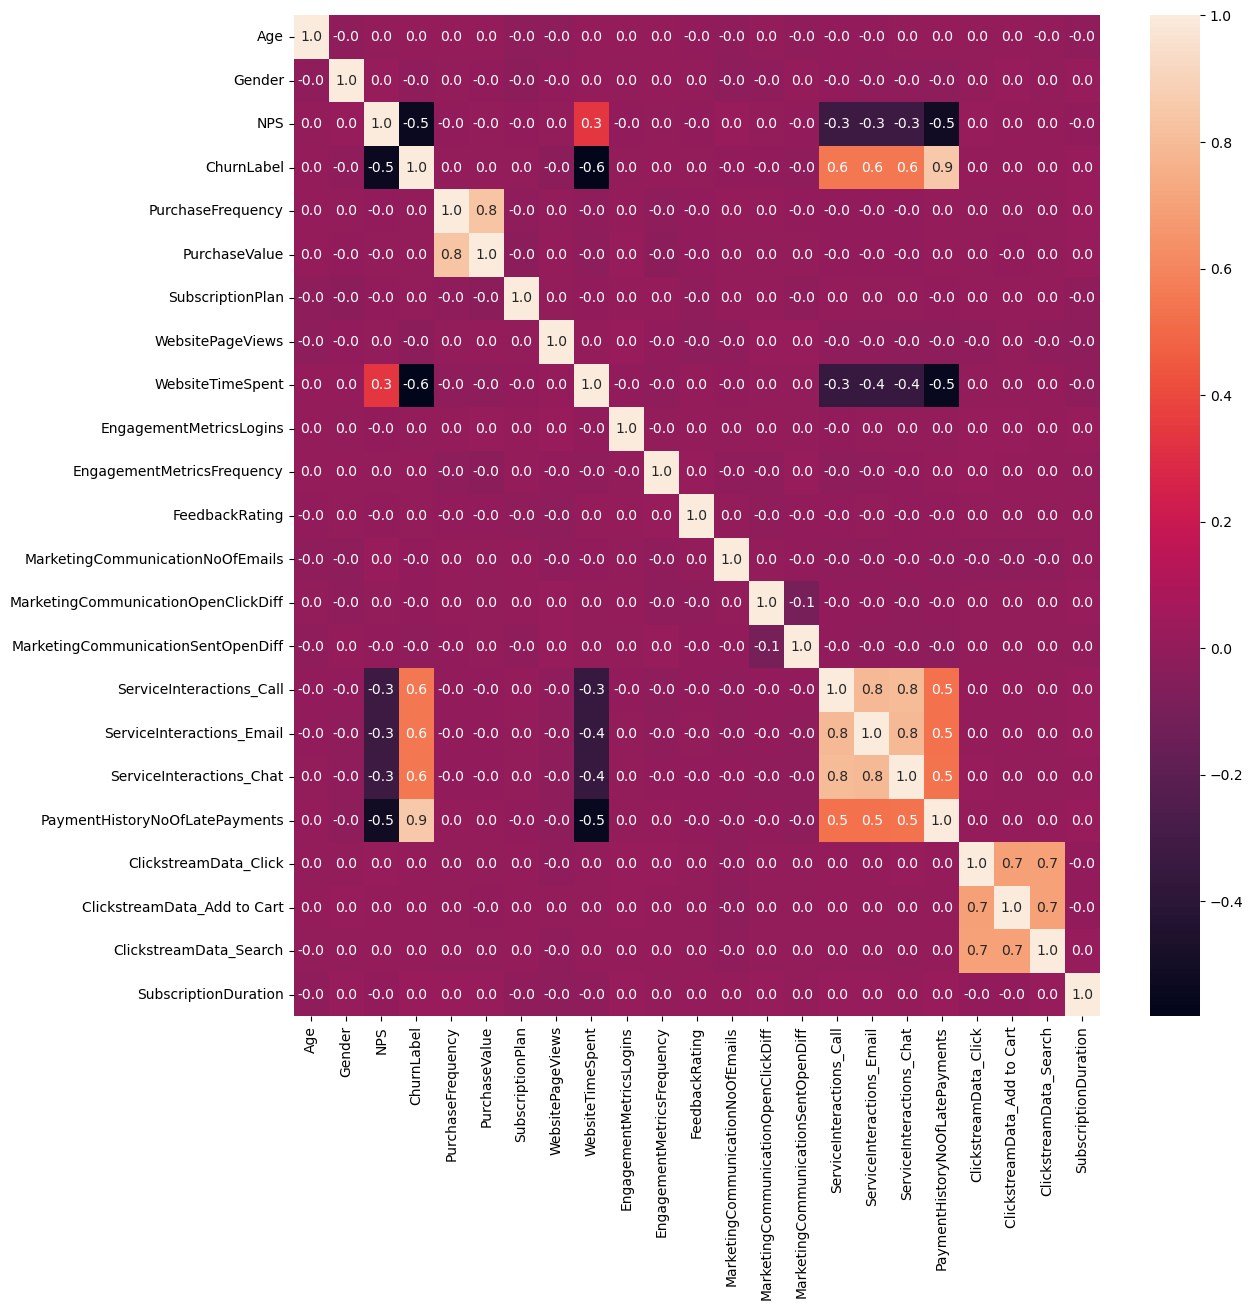

In [57]:
df_corr = df_.corr()
fig,ax = plt.subplots(figsize =(13,13))
sns.heatmap(df_corr, annot=True, fmt ='.1f', ax=ax)
plt.show()

## Splitting our data

In [58]:
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val  = train_test_split(X_other, y_other)

## Standardizing our data

In [59]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

## Modeling
Two different models for modeling:
 - LogisticRegression
 - DecisionTreeClassifier
    
Metrics:
 - Accuracy score
 - Prediction score
 - Recall score
 - F1 score

In [60]:
def evaluate(X, y, model, subset = ''):
    y_pred = model.predict(X)
    
    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score(y_pred,y)}')
    print(f'{subset} Recall Score: {recall_score(y_pred,y)}')
    print(f'{subset} F1 Score: {f1_score(y_pred, y)}')

In [62]:
# Build the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Evaluate the model 
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'validation')

Train Accuracy Score: 0.9709593430803124
Train Precision Score: 0.965938176806458
Train Recall Score: 0.9767071471232331
Train F1 Score: 0.9712928133042962
validation Accuracy Score: 0.976
validation Precision Score: 0.9772727272727273
validation Recall Score: 0.9741100323624595
validation F1 Score: 0.9756888168557536


In [64]:
#Build the model
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

#Evaluate on rain and validation subsets
evaluate(X_train, y_train, dt, 'Train')
evaluate(X_val, y_val, dt, 'Validation')


Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335302
Validation Accuracy Score: 0.9792
Validation Precision Score: 0.9837662337662337
Validation Recall Score: 0.9742765273311897
Validation F1 Score: 0.9789983844911146


In [65]:
# Evaluation on the test set
evaluate(X_test, y_test, lr, 'LogisticRegression')
evaluate(X_test, y_test, lr, 'DecisionTreeClassifier')


LogisticRegression Accuracy Score: 0.9663461538461539
LogisticRegression Precision Score: 0.9622437971952535
LogisticRegression Recall Score: 0.9695652173913043
LogisticRegression F1 Score: 0.9658906334596643
DecisionTreeClassifier Accuracy Score: 0.9663461538461539
DecisionTreeClassifier Precision Score: 0.9622437971952535
DecisionTreeClassifier Recall Score: 0.9695652173913043
DecisionTreeClassifier F1 Score: 0.9658906334596643


### Plot the confusion matrix

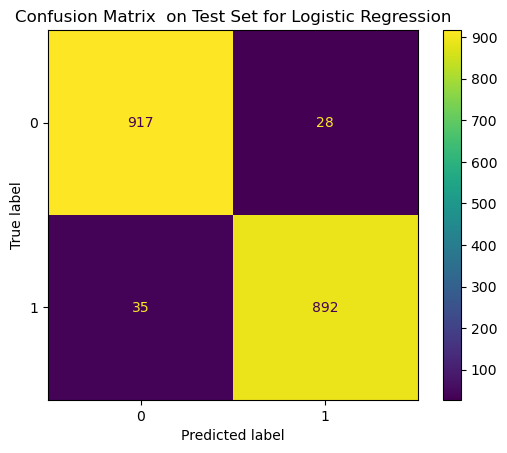

In [66]:
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix  on Test Set for Logistic Regression')
plt.show()

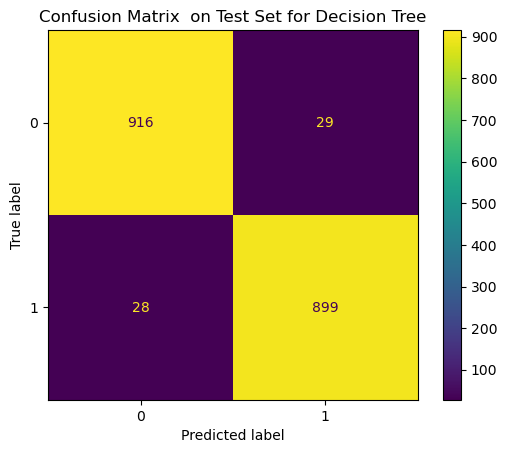

In [69]:
dt_y_pred = dt.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix  on Test Set for Decision Tree')
plt.show()

## Conclusion

The most important Features:
- The number of service interactions the customer has had through call, email and chat
- The number of times the customer has made Late Payments
- The time spent on the company's website.
- The Net Promoter Score(NPS).